In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from  sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neighbors import KNeighborsRegressor

import sklearn.datasets as datasets

D:\anacondna\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\郭高勤\scikit_learn_data


In [4]:
data = faces['images']
data.shape

(400, 64, 64)

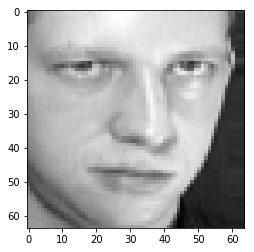

In [5]:
index = np.random.randint(400,size = 1)[0]

plt.imshow(data[index],cmap = plt.cm.gray)

In [11]:
#上半张人脸
X = data[:,:32].reshape(400,-1)

#下半张人脸
y = data[:,32:].reshape(400,-1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 10)

In [14]:
X_train.shape

(390, 2048)

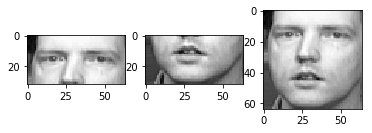

In [17]:
index = np.random.randint(390,size = 1)[0]

face_up = X_train[index].reshape(32,64)
face_down = y_train[index].reshape(32,64)
ax = plt.subplot(1,3,1)
ax.imshow(face_up,cmap = plt.cm.gray)

ax = plt.subplot(1,3,2)
ax.imshow(face_down,cmap = plt.cm.gray)

ax = plt.subplot(1,3,3)
ax.imshow(np.concatenate([face_up,face_down],axis = 0),cmap = 'gray')

In [18]:
estimators = {}

estimators['KNN'] = KNeighborsRegressor(n_neighbors=5)

estimators['Lr'] = LinearRegression()

estimators['Ridge'] = Ridge(alpha=1)

estimators['Lasso'] = Lasso(alpha=1)

In [19]:
predict_ = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    
    y_ = model.predict(X_test)
    
    predict_[key] = y_

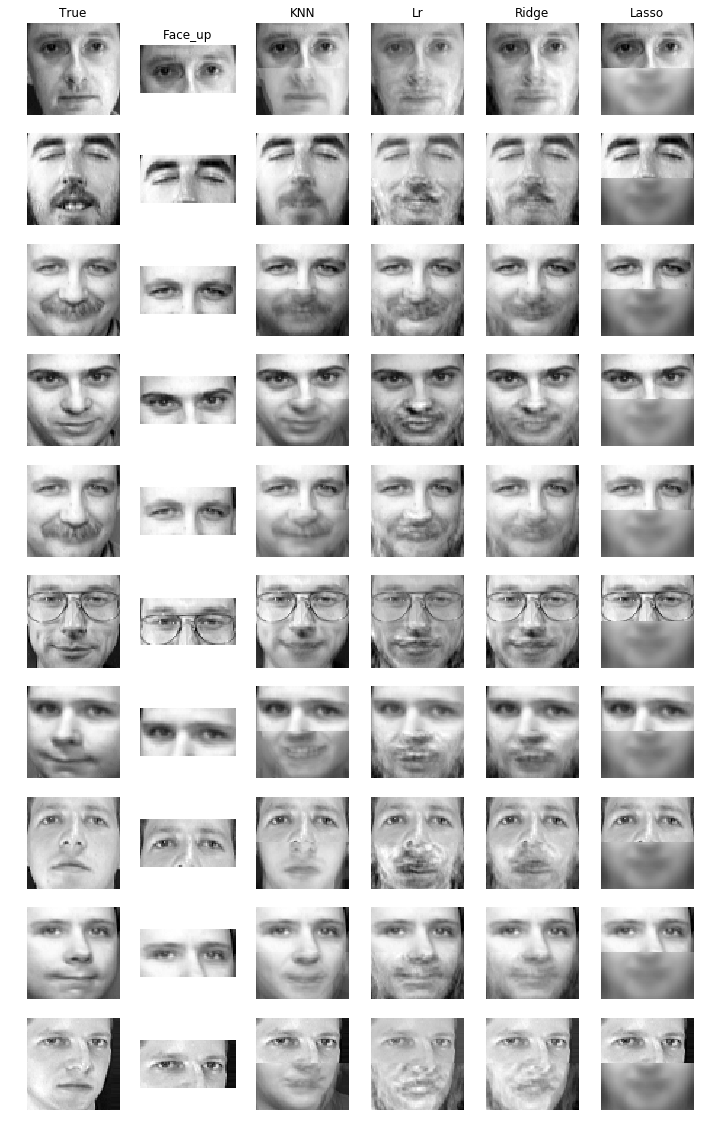

In [26]:
#可视化


plt.figure(figsize=(6*2,10*2))

for i in range(10):
    ax = plt.subplot(10,6,1+i*6)
    face_up = X_test[i].reshape(32,64)
    face_down = y_test[i].reshape(32,64)
    ax.imshow(np.concatenate([face_up,face_down],axis = 0),cmap = 'gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('True')
    
    ax = plt.subplot(10,6,2+i*6)
    ax.imshow(face_up,cmap = 'gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('Face_up')
        
        
#     第三列：3 + i*6 第四列4 + i*6 
#     预测人脸 predict_ 字典
    for j ,key in enumerate(predict_):
        ax = plt.subplot(10,6,3 + j + i * 6)
        
        y_ = predict_[key]
        
        face_down_ = y_[i].reshape(32,64)
        
        ax.imshow(np.concatenate([face_up,face_down_],axis = 0),cmap = plt.cm.gray)
        
        ax.axis('off')
        
        if i ==0:
            ax.set_title(key)